N-S equations
$$
\frac{\partial{\textbf{u}}}{\partial{t}} = -\nabla \cdot \textbf{u} \textbf{u} + \frac{\mu}{\rho} \nabla^2 \textbf{u} - \frac{1}{\rho} \nabla p + \textbf{g}
$$
$$
\nabla^2p = S
$$

# Example 1 - Steady State Heat Equation in 1D
In this example we solve the following steady state equation

\begin{align}

\frac{\mathrm{d}^2 T}{\mathrm{d}x^2} = H (T - T_{\infty})
\end{align}

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:

L = 1.0 # m, Length of the rod
n = 100 

x = np.linspace(0, L, n)
dx = x[1] - x[0]
H = 100
Tleft = 200 # K
Tright = 300 # K
Tinf = 500 # K 

ud = np.ones(n-1)
ud[0] = 0

ld = np.ones(n-1)
ld[-1] = 0

md = -(2.0+H*dx**2)*np.ones(n)
md[[0, -1]] = 1

A = np.diag(ld, -1) + np.diag(md, 0) + np.diag(ud, 1)

b = -(H*dx**2*Tinf)*np.ones(n)
b[0] = Tleft
b[-1] = Tright

sol = np.linalg.solve(A, b)

plt.plot(x, sol)

# Example 2: 1D Unsteady Diffusion with FTCS Scheme

\begin{align}
\frac{\partial u}{\partial t} &= \mu \frac{\partial ^2 u}{\partial x^2} 
\end{align}
Subject to:
\begin{align*}
u(x, t=0) &= U_0 (x) \\
u(x = 0, t) &= 0 \\
u(x = L, t) &= 0
\end{align*}


In [ ]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt 
import matplotlib.animation as animation


plt.rcParams['animation.html'] = 'jshtml'

In [ ]:
n = 101
L = 1.0 # length of domain
x = np.linspace(0, L, n)
dx = x[1] - x[0]

mu = 1e-2 # thermal diffusivity m2/s

# define intial condition
U0 = np.sin(2*np.pi*x) # + 0.2*np.sin(30*np.pi*x)

# define Fourier number
Fo = 0.25

# define time step 
dt = Fo * dx * dx /mu
tend = 10.0 # s


sol = [] 
sol.append(U0)
t = 0.0 # starting time

while t < tend:
    un = sol[-1]
    unp1 = np.zeros_like(un)
    unp1[1:-1] = un[1:-1] + mu*dt/dx/dx * (un[:-2] - 2*un[1:-1] + un[2:])

    # set  the bcs
    unp1[0] = 0.0
    unp1[-1] = 0.0
    sol.append(unp1)
    t += dt



In [ ]:
ims = []
fig = plt.figure(figsize=[5,4], dpi=200)
plt.grid()


i = 0
for solution in sol:
    if (i%100==0):
        im = plt.plot(x, solution, 'ko-', markersize=1, animated=True)
        plt.ylim(-1.1, 1.1)
        ims.append(im)

    i += 1

ani = animation.ArtistAnimation(fig, ims, interval=35, blit=True, repeat_delay=3000)
ani
# ani.save("ftcs.mp4")

 # Example 3: 1D Unsteady Advection on a Periodic Domain with FTCS Scheme

 \begin{align*}
\frac{\partial u}{\partial t} = -c \frac{\partial u}{\partial x}
 \end{align*}
 with $u(x, t=0) = U_0 (x)$

This is represented numerically as:
\begin{align*}
u_i ^{n+1} = u_i ^ n - c \frac{\Delta t}{2 \Delta x} (u_{i+1} ^ n - u_{i-1}^n)
\end{align*}

Note: This scheme is unconditionally unstable... It introduces negative diffusion.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline
%config InlineBackend.figure_format = "svg"

plt.rcParams["animation.html"] = "jshtml"


In [ ]:
n = 100 # number of grid points
L = 5.0 # length of domain
x = np.linspace(0, L, n)
dx = x[1] - x[0]

# define a gaussian initial condition
u0_ = lambda x, a0, s: np.exp(-(x-a0)**2/s/s)
u0 = u0_(x, 1, 0.25)

plt.plot(x, u0_(x,1,0.25), 'ob', markersize=2)

In [ ]:
dt = 0.01 # timestep size
tend = 1000*dt 

c = 1.0 # m/s wave speed

sol = []

u = np.zeros(n+2) # Including ghost points
u[1:-1] = u0 

# apply periodic conditions
u[0] = u[-3]
u[-1] = u[2]

sol.append(u)
t= 0.0
while t < tend:
    un = sol[-1]
    unew = np.zeros_like(un)
    unew[1:-1] = un[1:-1] - c*dt/2.0/dx * (un[2:] - un[:-2])

    unew[0] = unew[-3]
    unew[-1] = unew[2]

    sol.append(unew)
    t += dt



In [ ]:
ims = []
fig = plt.figure(figsize=[5,4], dpi=200)
plt.grid()


i = 0
for solution in sol:
    if (i%10==0):
        im = plt.plot(x, solution[1:-1], 'ko-', markersize=1, animated=True)
        plt.ylim(-0.1, 1.1)
        ims.append(im)

    i += 1

ani = animation.ArtistAnimation(fig, ims, interval=35, blit=True, repeat_delay=3000)
ani

 # Example 4: 1D Unsteady Advection on a Periodic Domain with FTUS Scheme

 \begin{align*}
\frac{\partial u}{\partial t} = -c \frac{\partial u}{\partial x}
 \end{align*}
 with $u(x, t=0) = U_0 (x)$

This is represented numerically as:
\begin{align*}
u_i ^{n+1} = u_i ^ n - c \frac{\Delta t}{\Delta x} (u_{i} ^ n - u_{i-1}^n)
\end{align*}


In [ ]:
import matplotlib.animation as animation

%matplotlib inline
%config InlineBackend.figure_format = "svg"

plt.rcParams["animation.html"] = "jshtml"

In [ ]:
n = 100 # number of grid points
L = 5.0 # length of domain
x = np.linspace(0, L, n)
dx = x[1] - x[0]

# define a gaussian initial condition
u0_ = lambda x, a0, s: np.exp(-(x-a0)**2/s/s)
u0 = u0_(x, 1, 0.25)

plt.plot(x, u0_(x,1,0.25), 'ob', markersize=2)

In [ ]:
dt = 0.01 # timestep size
tend = 1000*dt 

c = 1.0 # m/s wave speed

sol = []

u = np.zeros(n+2) # Including ghost points
u[1:-1] = u0 

# apply periodic conditions
u[0] = u[-3]
u[-1] = u[2]

sol.append(u)
t= 0.0
while t < tend:
    un = sol[-1]
    unew = np.zeros_like(un)
    unew[1:-1] = un[1:-1] - c*dt/dx * (un[1:-1] - un[:-2])

    unew[0] = unew[-3]
    unew[-1] = unew[2]

    sol.append(unew)
    t += dt



In [ ]:
ims = []
fig = plt.figure(figsize=[5,4], dpi=200)
plt.grid()


i = 0
for solution in sol:
    if (i%10==0):
        im = plt.plot(x, solution[1:-1], 'ko-', markersize=1, animated=True)
        plt.ylim(-0.1, 1.1)
        ims.append(im)

    i += 1

ani = animation.ArtistAnimation(fig, ims, interval=35, blit=True, repeat_delay=3000)
ani

# 1D Linear Advection Difussion with FTCS (central on both adv and diff)

\begin{align*}
\frac{\partial u}{\partial t} = -c \frac{\partial u}{\partial x} + \mu \frac{\partial ^2 u}{\partial x^2}
\end{align*}

This can be written numerically as:
\begin{equation}
u_i^{n+1} = u_i^n - c \frac{\Delta t}{2 \Delta x}(u_{n+1}^n - u_{n-1}^n) + \mu \frac{\Delta t}{\Delta x^2} (u_{i+1}^n - 2u_i^n + u_{i-1}^n)
\end{equation}

In [38]:
import matplotlib.animation as animation

%matplotlib inline
%config InlineBackend.figure_format = "svg"

plt.rcParams["animation.html"] = "jshtml"

In [39]:
n = 100 # number of grid points
L = 5.0 # length of domain
x = np.linspace(0, L, n)
dx = x[1] - x[0]

# define a gaussian initial condition
u0_ = lambda x, a0, s: np.exp(-(x-a0)**2/s/s)
u0 = u0_(x, 1, 0.25)

In [49]:
dt = 0.001 # timestep size
tend = 2

c = 1.0 # m/s wave speed
mu = 1e-2 # thermal diffusivity m2/s

# Courant number
Cr = c*dt/dx
# Fourier number
Fo = mu*dt/dx/dx 

sol = []

u = np.zeros(n+2) # Including ghost points
u[1:-1] = u0 

# apply periodic conditions
u[0] = u[-3]
u[-1] = u[2]

sol.append(u)
t= 0.0
while t < tend:
    un = sol[-1]
    unew = np.zeros_like(un)
    unew[1:-1] = un[1:-1] - Cr/2.0 * (un[2:] - un[:-2]) + Fo*(un[2:] + 2*un[1:-1] - un[:-2])

    unew[0] = unew[-3]
    unew[-1] = unew[2]
    
    sol.append(unew)
    t += dt

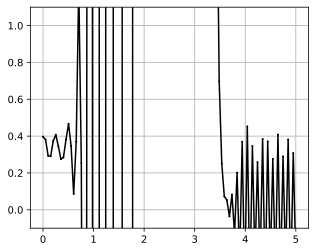

In [50]:
ims = []
fig = plt.figure(figsize=[5,4], dpi=200)
plt.grid()


i = 0
for solution in sol:
    if (i%10==0):
        im = plt.plot(x, solution[1:-1], 'ko-', markersize=1, animated=True)
        plt.ylim(-0.1, 1.1)
        ims.append(im)

    i += 1

ani = animation.ArtistAnimation(fig, ims, interval=35, blit=True, repeat_delay=3000)
ani